In [23]:
#perintah-perintah di bawah digunakan untuk mengambil fungis-fungsi dari suatu library tertentu
import numpy as np #berfungsi untuk memanggil import numpy yang diinisialkan dengan np
#library numpy digunakan untuk membuat array dan matriks
import cv2 #library cv2 digunakan untuk memodifikasi gambar
import matplotlib.pyplot as plt #berfungsi untuk memanggil import matplotlib.pyplot yang diinisialkan dengan plt
#library matplotlib digunakan untuk membuat sebuah visualisasi/diagram

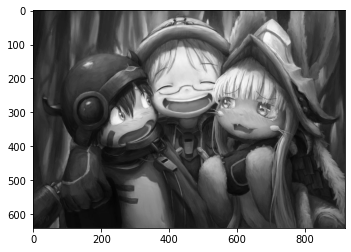

In [24]:
gambar = cv2.imread("modul6.jpg") #untuk mengimport modul6.jpg kedalam variabel gambar
gmbr = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
#fungsi cv2.cvtColor digunakan untuk mengubah basis warna file, yang kemudian akan dimasukkan ke dalam variabel gmbr
#kemudian warna akan dirubah dari bgr menjadi grayscale menggunakan cv2.COLOR_BGR2GRAY dan dimasukkan ke variabel gmbr

#menampilkan gambar 
plt.imshow(gmbr, cmap='gray')
#plt.imshow digunakan untuk menampilkan gambar bersamaan dengan diagram jumlah baris dan kolomnya
#gambar yang ditampilkan adalah gambar dari variabel gmbr, dengan skala warna abu yang dipanggil dengan perintah cmap='gray'

In [25]:
#variabel-variabel dibawah adalah sebuah kernel yang dibuat dengan menggunakan fungsi np.array
#dimana fungsi np.array() akan membuat sebuah array yang nantinya akan menjadi matriks

#matriks sx dan sy sebagai operator sobel
sx=np.array([[-1,0,1],
            [-2,0,2],
            [-1,0,1]])
sy=np.array([[-1,-2,-1],
            [0,0,0],
            [1,2,1]])
#matriks px dan py sebagai operator prewitt
px=np.array([[-1,0,1],
            [-1,0,1],
            [-1,0,1]])
py=np.array([[-1,-1,-1],
            [0,0,0],
            [1,1,1]])
#matriks rx dan ry sebagai operator robert
rx=np.array([[1,0],
            [0,-1]])
ry=np.array([[0,1],
            [-1,0]])
#menampilkan hasil array
print(sx)
print(sy)
print( )

print(px)
print(py)
print( )

print(rx)
print(ry)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]

[[ 1  0]
 [ 0 -1]]
[[ 0  1]
 [-1  0]]


In [26]:
#membuat sebuah fungsi konvolusi(img_size: int, kernel_size: int) -> int
#fungsi ini berguna untuk menghitung jumlah pixel pada gambar yang akan dikonvoulsi
#fungsi ini dubuat agar citra tidak memerlukan tambahan pixel atau padding sehingga konvolusi dapat dilakukan dengan mengurangi pixel pada citra
#jumlah_pixel = 0 merupakan variabel akan berguna sebagai tempat output
def konvolusi(img_size: int, kernel_size: int) -> int:
    jumlah_pixel = 0 

    #variabel i akan dimasukkan nilai dari 0 sampai denagn nilai (img_size) 
    #kemudian i akan ditambah dengan nilai kernel_size yang menunjukkan ukuran kernel dan dimasukkan ke variabel jumlah
    #kemudian jika jumlah kurang dari img_size, maka akan dimasukkan ke dalam jumlah_pixel dengan menggunakan increment pada jumlah_pixel += 1
    #return jumlah_pixel akan mengeluarkan nilai berupa jumlah pixel yang dikonvolusi
    for i in range(img_size):
        jumlah = i + kernel_size
        if jumlah <= img_size:
            jumlah_pixel += 1   
    #fungsi kemudian akan memasukkan nilai jumlah_pixel sebagai output dengan perintah return jumlah_pixel            
    return jumlah_pixel

In [27]:
#membuat sebuah fungsi deteksi_tepi yang berguna untuk melakukan deteksi tepi pada gambar dengan masukkan img dan kernel yang berupa array
#output dari fungsi ini adalah sebuah array dari citra yang sudah dideteksi tepinya
def deteksi_tepi(img: np.array, kernel1: np.array, kernel2: np.array) -> np.array:
    #sizeY adalah variabel jumlah baris yang dikonvolusi pada citra
    #sizeY akan menghitung banyaknya baris sebuah input img (img.shape[0]) sebagai img_size 
    #dan banyaknya baris input kernel kernel.shape[0] sebagai kernel_size
    sizeY = konvolusi(
        img_size=img.shape[0],
        kernel_size=kernel1.shape[0]
    )
    #sizeX adalah variabel jumlah kolom yang dikonvolusi pada citra
    #sizeX akan menghitung banyaknya kolom sebuah input img (img.shape[0]) sebagai img_size 
    #dan banyaknya kolom input kernel kernel.shape[0] sebagai kernel_size
    sizeX = konvolusi(
        img_size=img.shape[1],
        kernel_size=kernel1.shape[1]
    )
    #nilai pada kernel.shape[0] akan dimasukkan pada variabel tinggi_kernel sebagai variabel pembantu
    tinggi_kernel = kernel1.shape[0]
    #nilai pada kernel.shape[1] akan dimasukkan pada variabel lebar_kernel sebagai variabel pembantu
    lebar_kernel = kernel1.shape[1]

    #variabel x,y,dan m digunakan sebagai sebuah tempat matriks yang bernilai 0 dengan menggunakan fungsi np.zeros()
    #jumlah baris pada matriks x,y,dan m adalah sebanyak nilai sizeY 
    #jumlah kolom pada matriks x,y,dan m adalah sebanyak nilai sizeX
    y = np.zeros(shape=(sizeY, sizeX))
    x = np.zeros(shape=(sizeY, sizeX))
    m = np.zeros(shape=(sizeY, sizeX))

    #digunakan untuk melakukan perhitungan perulangan pada variabel i dari 0 sampai nilai (sizeY)
    for i in range(sizeY):
        #digunakan untuk melakukan perhitungan perulangan pada variabel j dari 0 sampai nilai (sizeX)
        for j in range(sizeX):
            #nilai i dan j akan dimasukkan sebagai banyaknya baris dan kolom yang akan dikonvolusi dalam matriks input img
            #kemudian akan dimasukkan ke dalam variabel matriks
            matriks = img[i:i+tinggi_kernel, j:j+lebar_kernel]

            #kemudian matriks dari variabel x dan y akan diisi dengan menggunakan fungsi np.sum dengan memasukkan kernel1 pada x dan kernel 2 pada y 
            #kemudian hasilnya akan dimasukkan ke dalam variabel x atau y dengan koordinat i dan j
            x[i, j] = np.sum(np.multiply(matriks, kernel1))
            y[i, j] = np.sum(np.multiply(matriks, kernel2))
            #kemudian hasil penjumlahan antara mutlak dari suatu piksel pada matriks x dan y akan dimasukkan pada koordinat i dan j pada matriks m
            m[i,j]=abs(x[i,j])+abs(y[i,j])
            #kemudian akan dibuat suatu batas, yang dimana jika m bernilai lebih besar atau sama dengan 120,maka piksel tersebut akan berubah nilai menjadi 255
            if(m[i,j]>=120): m[i,j]=255
            #dan jika tidak akan menjadi 0
            else: m[i,j]=0

    #fungsi kemudian akan memasukkan m sebagai output dengan perintah return m
    return m

In [28]:
#variabel img_sobel berisi matriks dari citra gmbr yang sudah dideteksi tepinya dengan kernel sx dan sy
img_sobel=deteksi_tepi(img=gmbr,kernel1=sx,kernel2=sy)

#variabel img_prewitt berisi matriks dari citra gmbr yang sudah dideteksi tepinya dengan kernel px dan py
img_prewitt=deteksi_tepi(img=gmbr,kernel1=px,kernel2=py)

#variabel img_robert berisi matriks dari citra gmbr yang sudah dideteksi tepinya dengan kernel rx dan ry
img_robert=deteksi_tepi(img=gmbr,kernel1=rx,kernel2=ry)

Text(0.5, 1.0, 'Robert')

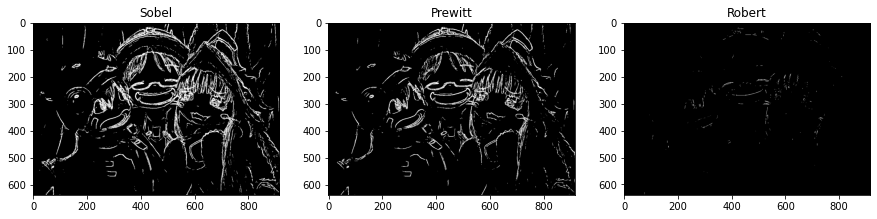

In [29]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1, 3, 1)
plt.imshow(img_sobel, cmap='gray') 
plt.title('Sobel')

fig.add_subplot(1, 3, 2)
plt.imshow(img_prewitt, cmap='gray') 
plt.title('Prewitt')

fig.add_subplot(1, 3, 3)
plt.imshow(img_robert, cmap='gray') 
plt.title('Robert')